#### Imports

In [21]:
# !conda install -c conda-forge altair vega_datasets notebook vega
# Data processing
import pandas as pd
import pickle

# Data visualization.
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

# Code for hiding seaborn warnings
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

#### Load Data

In [22]:
# Set the dataset file path.
AVArticle_File = '../01. DSCreation/AVArticles_dataset.csv'

# Create the dataframe from the csv file.
df = pd.read_csv(AVArticle_File)

#### Output the dataframe.

In [23]:
# Output the dataframe.
df.head()

,FileName,Content,Category,Complete_Filename
0,na,Markets Tech Media Success Perspectives Videos...,tech,na
1,na,"Full Episode Tuesday , Sep 7 Close Menu PBS Ne...",tech,na
2,na,Accessibility links Skip main content Keyboard...,tech,na
3,na,Skip main content Search Brookings About Us Pr...,tech,na


#### Number of articles in each category

In [24]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

#### % of articles in each category

In [25]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

#### News length by category

In [26]:
# Creates column, News_length, from the column Content's per row string length.
df['News_length'] = df['Content'].str.len()

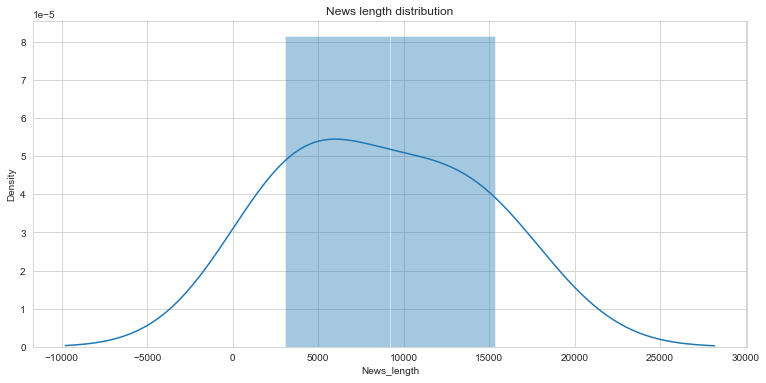

In [27]:
# Creates the plot from the News_Length column
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [28]:
# Displays the dataframe's descriptive statistics.
df['News_length'].describe()

count        4.000000
mean      8604.750000
std       5655.773768
min       3062.000000
25%       4445.000000
50%       8013.500000
75%      12173.250000
max      15330.000000
Name: News_length, dtype: float64

#### Remove the 95% percentile & reprocess the plot.

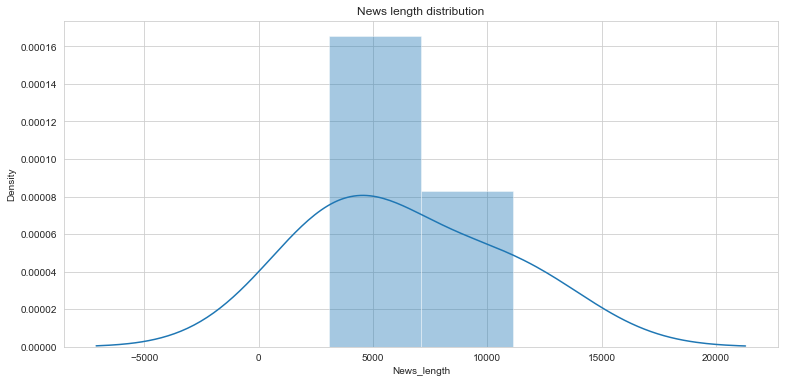

In [29]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

#### Get articles with > 10,000 length

In [30]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

2

In [31]:
# Display the content.
df_more10k['Content'].iloc[0]

"Markets Tech Media Success Perspectives Videos Edition U.S. International Arabic Español Markets Tech Media Success Perspectives Videos Search Edition U.S. International Arabic Español Markets Premarkets Dow After-Hours Market Movers Fear & Greed World Markets Investing Markets Now Before Bell Leading Indicator Global Energy Challenge Economy Tracking America 's Recovery Energy Money Tech Innovate Gadget Foreseeable Future Mission : Ahead Upstarts Business Evolved Innovative Cities Unhackable Media Reliable Sources Success Boss Files Risk Takers Fresh Money Invest Ahead Work Transformed Cars Homes Wealth Coach Center Piece Perspectives Videos International Switzerland India Davos Reliable Sources Passion Portfolio On : Germany More Accessibility & CC About Us Newsletters US World Politics Business Opinion Health Entertainment Tech Style Travel Sports Videos Audio Coupons Weather More Follow CNN Business Your self-driving car still n't ready . Smarter roads might change By Matt McFarla

#### Plot the boxplot.

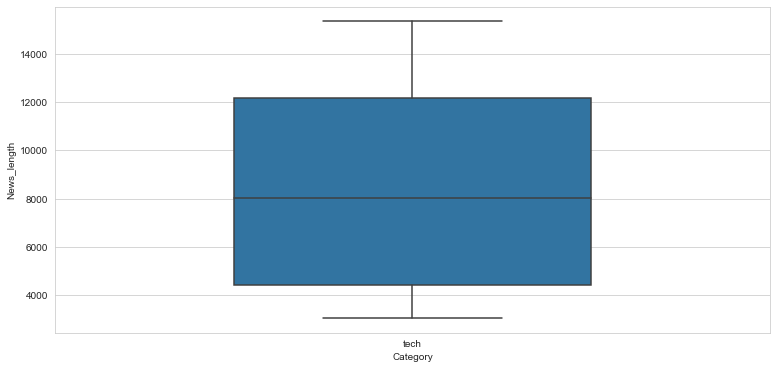

In [32]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

#### Plot the boxplot with larger documents removed.

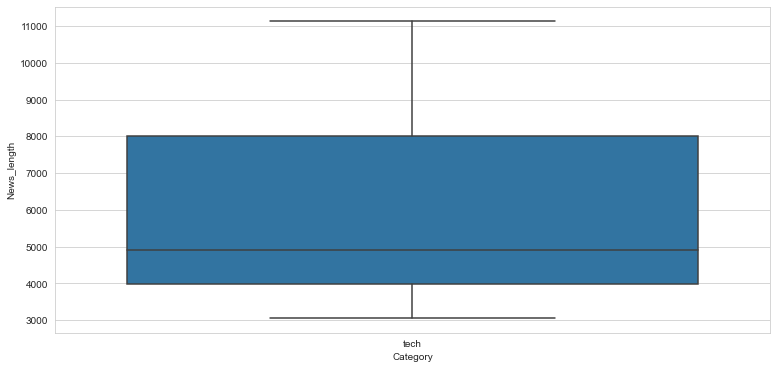

In [33]:
# Create the boxplot.
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

#### Save the dataset.

In [34]:
with open('AVArticles_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)